In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\ronal\Downloads\anemia.csv')

In [5]:
data

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,15.148357,23.236254,29.838467,83.554121,0
1,0,15.830868,25.217524,27.716110,71.970087,0
2,0,9.323844,21.080395,29.708388,71.446780,1
3,0,15.661515,15.477595,30.851349,87.645449,0
4,1,14.582923,21.016822,27.905567,98.502234,0
...,...,...,...,...,...,...
1416,0,10.628507,26.212979,28.154147,82.650683,1
1417,1,12.234296,29.409390,29.956115,86.424408,1
1418,1,13.864234,17.620477,28.598816,80.529089,1
1419,0,14.553918,16.347812,29.356603,94.696536,0


In [7]:
data['Result'].value_counts()

Result
0    794
1    627
Name: count, dtype: int64

# Show  And Exploration For Data

In [10]:
data

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,15.148357,23.236254,29.838467,83.554121,0
1,0,15.830868,25.217524,27.716110,71.970087,0
2,0,9.323844,21.080395,29.708388,71.446780,1
3,0,15.661515,15.477595,30.851349,87.645449,0
4,1,14.582923,21.016822,27.905567,98.502234,0
...,...,...,...,...,...,...
1416,0,10.628507,26.212979,28.154147,82.650683,1
1417,1,12.234296,29.409390,29.956115,86.424408,1
1418,1,13.864234,17.620477,28.598816,80.529089,1
1419,0,14.553918,16.347812,29.356603,94.696536,0


In [12]:
data.head(5)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,15.148357,23.236254,29.838467,83.554121,0
1,0,15.830868,25.217524,27.716110,71.970087,0
2,0,9.323844,21.080395,29.708388,71.446780,1
3,0,15.661515,15.477595,30.851349,87.645449,0
4,1,14.582923,21.016822,27.905567,98.502234,0


In [14]:
data.shape

(1421, 6)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [18]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.432429,22.922482,30.234469,85.509735,0.441239
std,0.499745,2.031305,4.006752,1.482124,9.640086,0.496710
min,0.000000,6.459035,14.897893,26.553365,68.342872,0.000000
25%,0.000000,11.799681,19.452327,29.043752,77.099197,0.000000
50%,1.000000,13.347842,22.686829,30.279667,85.328351,0.000000
75%,1.000000,15.055625,26.243159,31.446686,94.055096,1.000000
max,1.000000,18.119876,30.738765,34.076028,102.750450,1.000000


In [20]:
data.duplicated().sum()

0

In [22]:
null=data.isnull().sum()
null[null>0]

Series([], dtype: int64)

# Analysis For Data

In [25]:
data.corr()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
Gender,1.000000,0.014426,0.004336,0.011661,-0.038115,0.234006
Hemoglobin,0.014426,1.000000,0.012303,-0.031676,-0.039445,-0.687049
MCH,0.004336,0.012303,1.000000,0.027541,-0.015290,-0.042922
MCHC,0.011661,-0.031676,0.027541,1.000000,0.074713,0.021116
MCV,-0.038115,-0.039445,-0.015290,0.074713,1.000000,-0.024521
Result,0.234006,-0.687049,-0.042922,0.021116,-0.024521,1.000000


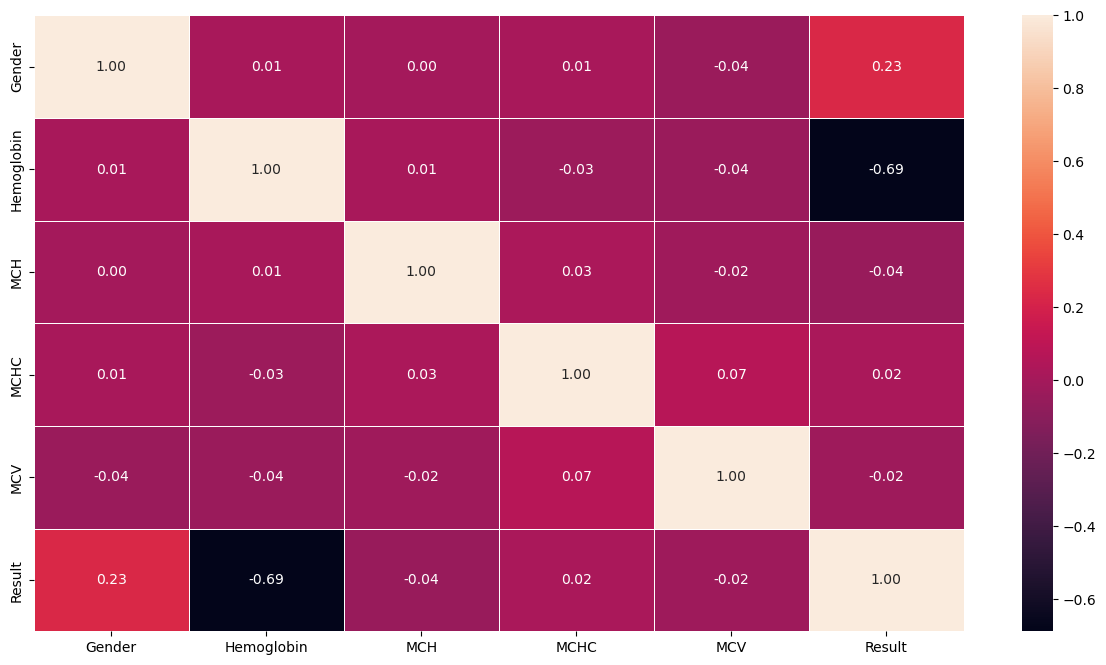

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidth=0.5)
plt.show()

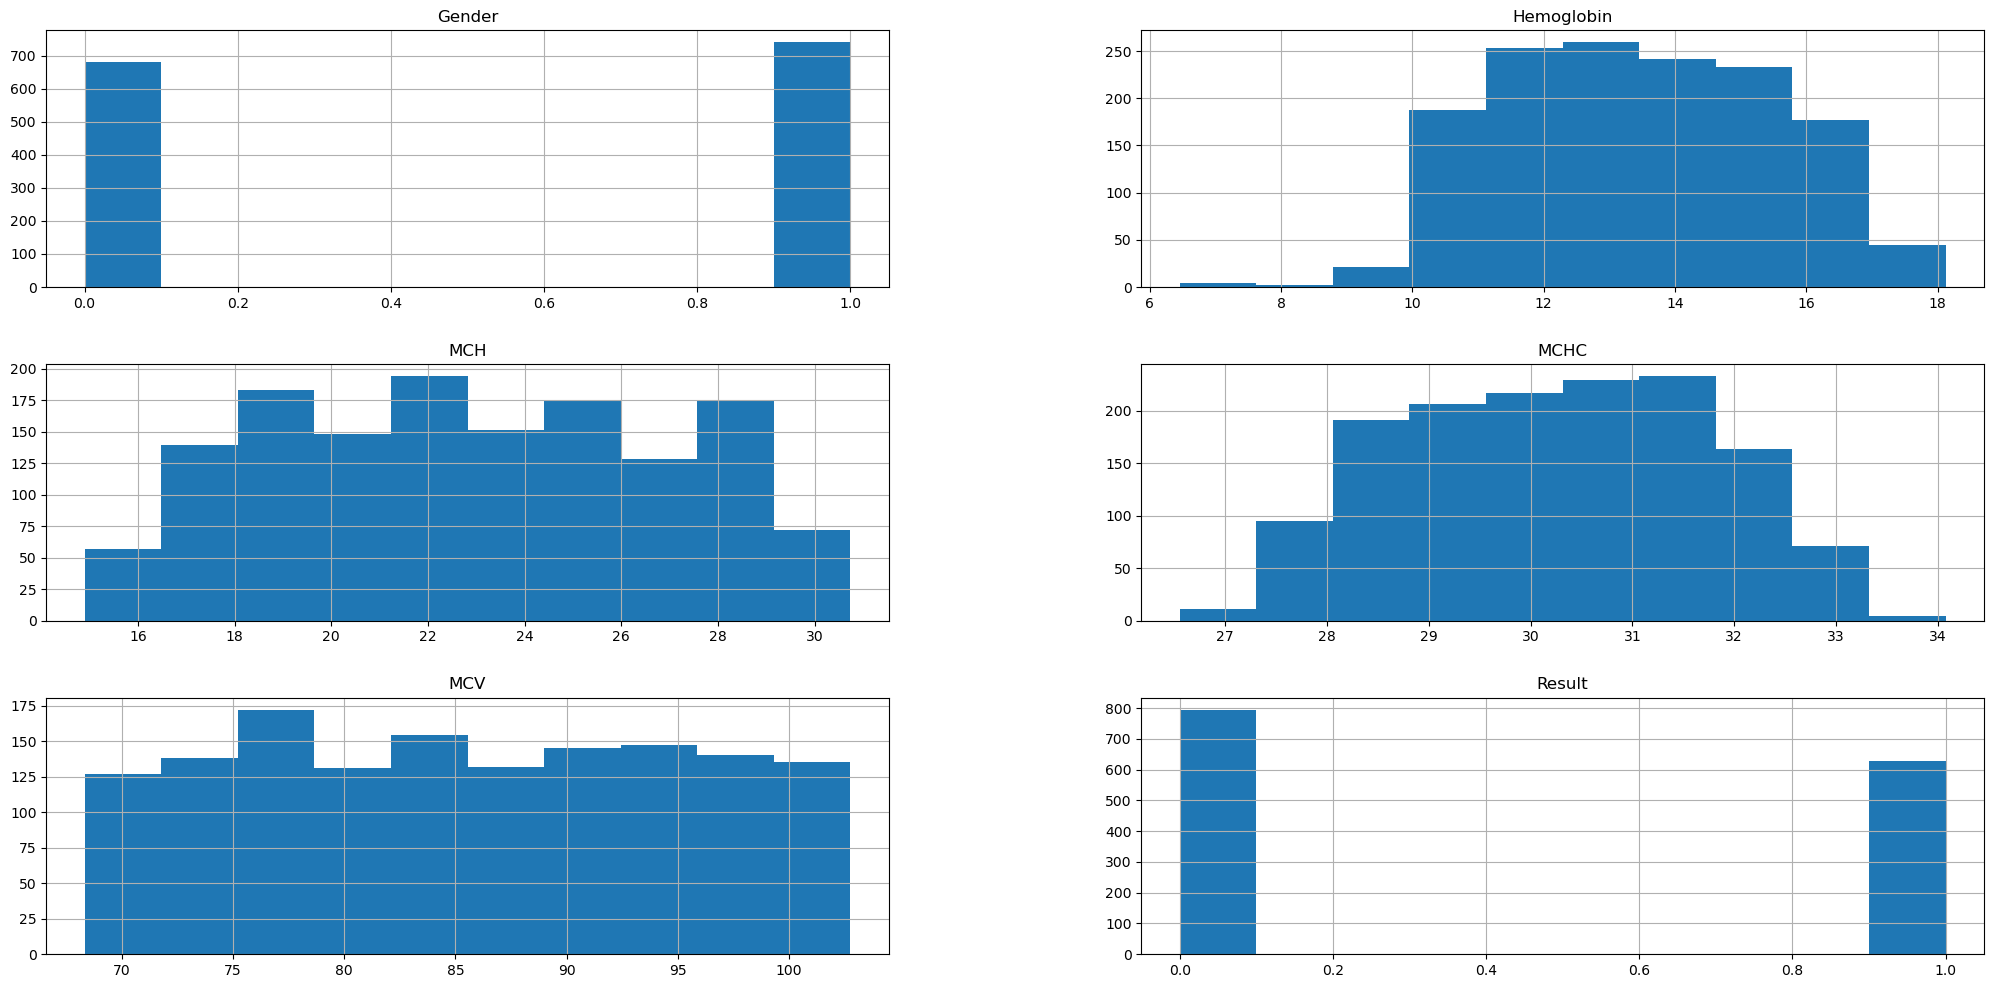

In [29]:
data.hist(figsize=(25,12))
plt.show()

# Create Models

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [34]:
x=data.drop(['Result'],axis=1)
y=data['Result']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,train_size=0.8 ,random_state=42)

In [38]:
model1=LogisticRegression()
model2=SVC()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier(n_estimators=1000,class_weight='balanced')
model5=GradientBoostingClassifier(n_estimators=4000)
model6=GaussianNB()

In [40]:
Algorithms=['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','GaussianNB']
accus=[]
recs=[]
f1s=[]

In [42]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test, average='weighted')
    f1=f1_score(pre,y_test, average='weighted')
    plt.figure(figsize=(4,2))
    sns.heatmap(confusion_matrix(pre,y_test),annot=True,fmt='0.2f',linewidth=0.5)
    confusion_matrix(pre,y_test)
    
    accus.append(accuracy)
    recs.append(recall)
    f1s.append(f1)
    
    print(model)
    print('accuracy_score is : ',accuracy)
    print('recall_score is : ',recall)
    print('f1_score is : ',f1)

LogisticRegression()
accuracy_score is :  0.9122807017543859
recall_score is :  0.9122807017543859
f1_score is :  0.9122501683155815


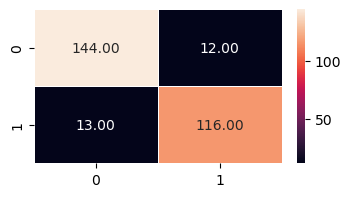

In [44]:
cal(model1)

SVC()
accuracy_score is :  0.8771929824561403
recall_score is :  0.8771929824561403
f1_score is :  0.8773399815419897


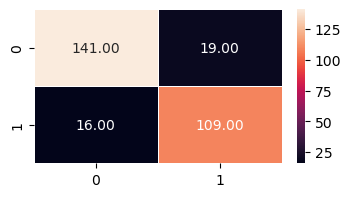

In [46]:
cal(model2)

DecisionTreeClassifier()
accuracy_score is :  0.8245614035087719
recall_score is :  0.8245614035087719
f1_score is :  0.8242613821159422


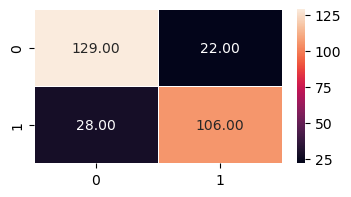

In [48]:
cal(model3)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)
accuracy_score is :  0.887719298245614
recall_score is :  0.887719298245614
f1_score is :  0.8881354859800272


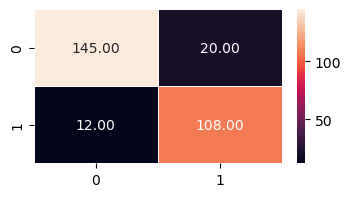

In [50]:
cal(model4)

GradientBoostingClassifier(n_estimators=4000)
accuracy_score is :  0.8631578947368421
recall_score is :  0.8631578947368421
f1_score is :  0.8637445005703113


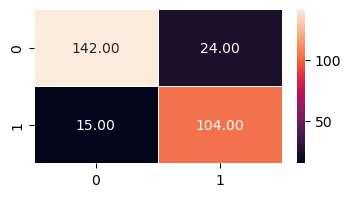

In [52]:
cal(model5)

GaussianNB()
accuracy_score is :  0.9017543859649123
recall_score is :  0.9017543859649123
f1_score is :  0.9018302758790728


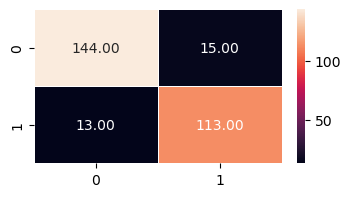

In [54]:
cal(model6)

In [56]:
final=pd.DataFrame({'Algorithm':Algorithms,'accuracy_score':accus,'recall_score':recs,'f1_score':f1s})
final

,Algorithm,accuracy_score,recall_score,f1_score
0,LogisticRegression,0.912281,0.912281,0.912250
1,SVC,0.877193,0.877193,0.877340
2,DecisionTreeClassifier,0.824561,0.824561,0.824261
3,RandomForestClassifier,0.887719,0.887719,0.888135
4,GradientBoostingClassifier,0.863158,0.863158,0.863745
5,GaussianNB,0.901754,0.901754,0.901830


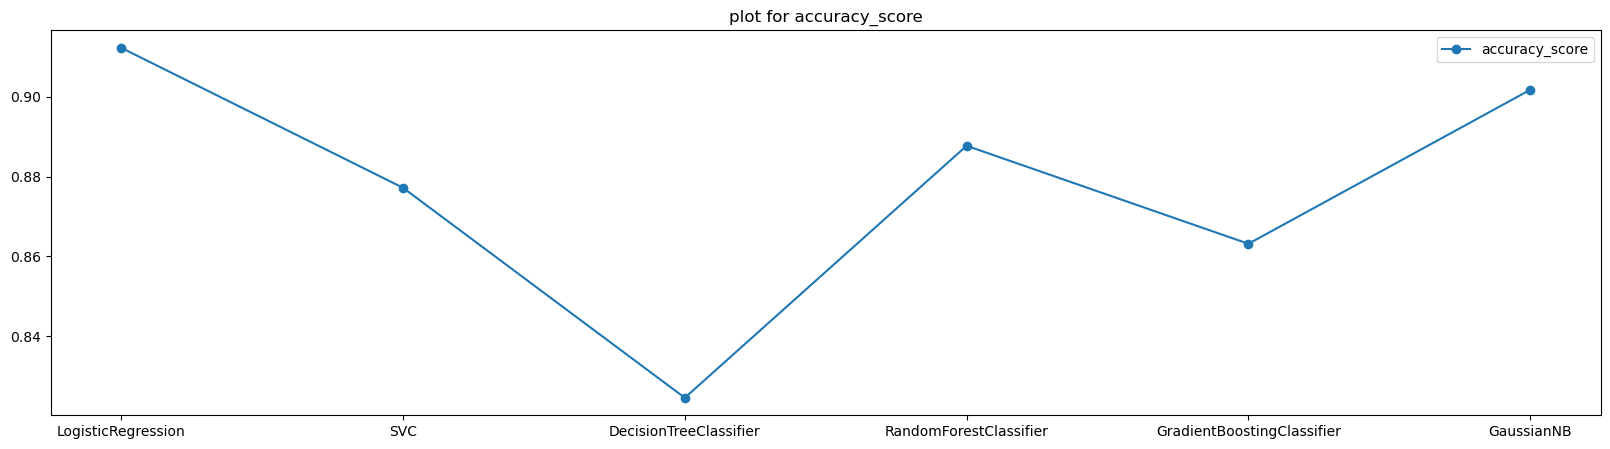

In [58]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final.Algorithm,accus,label='accuracy_score',marker='o')
plt.title('plot for accuracy_score')
plt.legend()
plt.show()

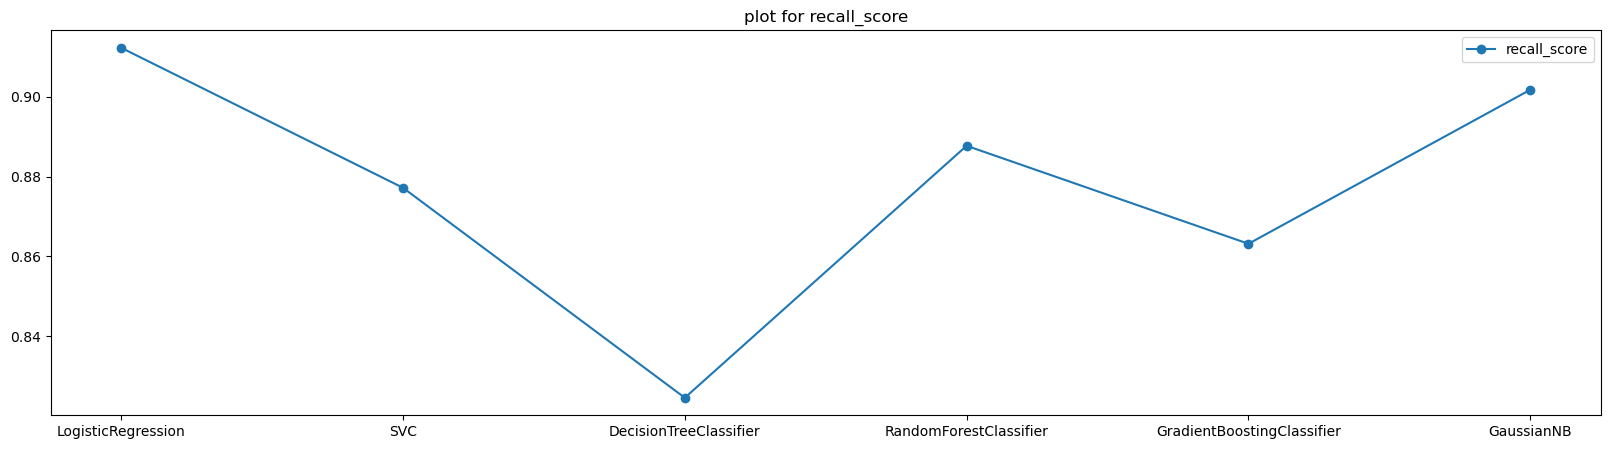

In [60]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final.Algorithm,recs,label='recall_score',marker='o')
plt.title('plot for recall_score')
plt.legend()
plt.show()

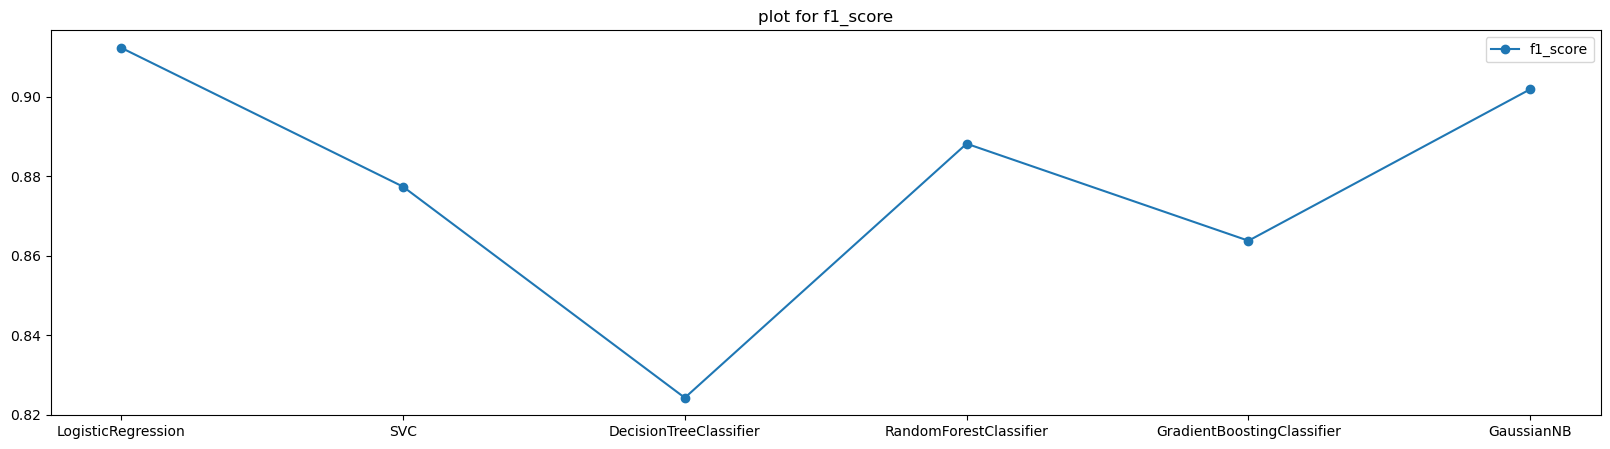

In [62]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final.Algorithm,f1s,label='f1_score',marker='o')
plt.title('plot for f1_score')
plt.legend()
plt.show()

# Take Our Model 

In [ ]:
import pickle
import joblib

with open('Logistic_Regression_model.pkl', 'wb') as f:
    pickle.dump(model1, f)
print("Model saved as pickle → Logistic_Regression_model.pkl")

joblib.dump(model1, 'Logistic_Regression_model.joblib')
print("Model saved as joblib → Logistic_Regression_model.joblib")

Model saved as pickle → Logistic_Regression_model.pkl
Model saved as joblib → Logistic_Regression_model.joblib


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
